# Analytical and numerical calculation of the order of approximation of a derivative calculated through finite differences (optional).

## 1 – The numerical test of the high-order formula

Implement the finite difference formula given by the first term on the right of Eq (5) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization)  into the program you developed for Exercise 1a and test if you get an approximation to the first derivative with an error that converges to zero like $(\Delta x)^4$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nm_lib import nm_lib as nm
# Define some simple global matplotlib settings
plt.rcParams.update(
    {"font.size" : "15",
     "font.family"          : "STIXGeneral",
     "mathtext.fontset"     : "stix",
     "figure.autolayout"    : "True",
     "figure.figsize"       : (7,7)
     }
)

def get_xx(nint: int, xf: float = 10.0, x0: float = -4.0) -> tuple[np.ndarray, float]:
    """
    Generate an array of x values from x0 to xf with nint number of intervals between points

    Arguments:
        nint {int} -- number of intervals between grid points

    Keyword Arguments:
        xf {float} -- last value in output array (default: {10.0})
        x0 {float} -- first value in output array (default: {-4.0})

    Returns:
        tuple[np.ndarray, float] -- (the resulting x array, spacing between points x[1]-x[0])
    """
    x = np.arange(nint+1)/nint * (xf-x0) + x0
    return x, x[1]-x[0]

def get_h(x: np.ndarray) -> np.ndarray:
    """
    Compute the value of test function (eq. 1) along input array x

    Arguments:
        x {np.ndarray} -- coordinate to compute function values along

    Returns:
        np.ndarray -- the resulting function values
    """
    return np.cos(np.pi*(x-1)/2)*np.exp(-((x-3)/2.5)**2)

def get_hp_analytic(x: np.ndarray) -> np.ndarray:
    """
    Computes the analytical first derivative of test function (eq. 1) along input array x

    Arguments:
        x {np.ndarray} -- coordinate to compute the derivative along

    Returns:
        np.ndarray -- the resulting derivative values
    """
    return np.exp(-0.16*(x-3)**2) * (1.5708*np.cos(np.pi*x/2) - (0.32*x-0.96)*np.sin(np.pi*x/2))

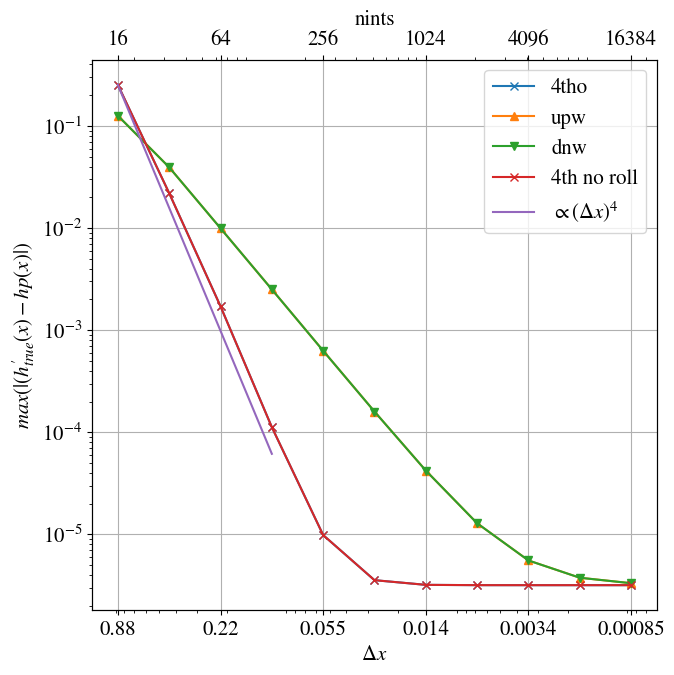

In [2]:
if __name__ == "__main__":
    nint = 11
    nints = np.logspace(4, nint+3, nint, base=2, dtype=int)
    dxs = np.zeros(len(nints))
    maxerrs4th = np.zeros_like(dxs)
    maxerrsup = np.zeros_like(dxs)
    maxerrsdown = np.zeros_like(dxs)
    maxerrs4thnoroll = np.zeros_like(dxs)
    for i, nint in enumerate(nints):
        xx, dxs[i]  = get_xx(nint)
        hh = get_h(xx)
        maxerrs4th[i]  = np.max(np.abs(get_hp_analytic(xx)[2:-2] - nm.deriv_4tho(xx, hh, method="roll")[2:-2]))
        maxerrsup[i]  = np.max(np.abs(get_hp_analytic(xx+dxs[i]/2)[:-1] - nm.deriv_upw(xx, hh, method="roll")[:-1]))
        maxerrsdown[i]  = np.max(np.abs(get_hp_analytic(xx-dxs[i]/2)[1:] - nm.deriv_dnw(xx, hh, method="roll")[1:]))
        maxerrs4thnoroll[i]  = np.max(np.abs(get_hp_analytic(xx)[2:-2] - nm.deriv_4tho(xx, hh)))

    fig, ax = plt.subplots()
    ax.loglog(dxs, maxerrs4th, "-x", label="4tho")
    ax.loglog(dxs, maxerrsup, "-^", label="upw")
    ax.loglog(dxs, maxerrsdown, "-v", label="dnw")
    ax.loglog(dxs, maxerrs4thnoroll, "-x", label="4th no roll")
    ax.loglog(dxs[:4], dxs[:4]**4/dxs[0]**4*maxerrs4th[0], label="$\propto(\Delta x)^4$")
    ax.set_xticks(dxs[::2], [f"{val:.2g}" for val in dxs][::2])
    ax.invert_xaxis()
    ax.legend()
    ax.grid()
    ax.set_xlabel("$\Delta x$")
    ax.set_ylabel("$max(|(h_{true}'(x)-hp(x)|)$")
    secax = ax.twiny()
    secax.loglog(nints, np.zeros_like(nints))
    secax.set_xticks(nints[::2], [f"{val:d}" for val in nints][::2])
    secax.set_xlabel("nints");

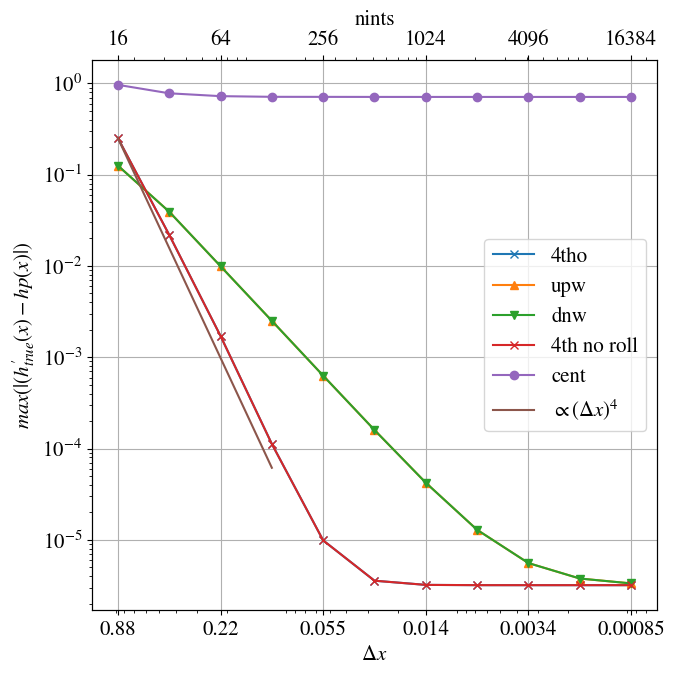

In [3]:
if __name__ == "__main__":
    nint = 11
    nints = np.logspace(4, nint+3, nint, base=2, dtype=int)
    dxs = np.zeros(len(nints))
    maxerrs4th = np.zeros_like(dxs)
    maxerrsup = np.zeros_like(dxs)
    maxerrsdown = np.zeros_like(dxs)
    maxerrs4thnoroll = np.zeros_like(dxs)
    maxerrscent = np.zeros_like(dxs)
    for i, nint in enumerate(nints):
        xx, dxs[i]  = get_xx(nint)
        hh = get_h(xx)
        maxerrs4th[i]  = np.max(np.abs(get_hp_analytic(xx)[2:-2] - nm.deriv_4tho(xx, hh, method="roll")[2:-2]))
        maxerrsup[i]  = np.max(np.abs(get_hp_analytic(xx+dxs[i]/2)[:-1] - nm.deriv_upw(xx, hh, method="roll")[:-1]))
        maxerrsdown[i]  = np.max(np.abs(get_hp_analytic(xx-dxs[i]/2)[1:] - nm.deriv_dnw(xx, hh, method="roll")[1:]))
        maxerrs4thnoroll[i]  = np.max(np.abs(get_hp_analytic(xx)[2:-2] - nm.deriv_4tho(xx, hh)))
        maxerrscent[i] = np.max(np.abs(get_hp_analytic(xx)[1:-1] - nm.deriv_cent(xx,hh,method="roll")[1:-1]))

    fig, ax = plt.subplots()
    ax.loglog(dxs, maxerrs4th, "-x", label="4tho")
    ax.loglog(dxs, maxerrsup, "-^", label="upw")
    ax.loglog(dxs, maxerrsdown, "-v", label="dnw")
    ax.loglog(dxs, maxerrs4thnoroll, "-x", label="4th no roll")
    ax.loglog(dxs, maxerrscent, "-o", label="cent")
    ax.loglog(dxs[:4], dxs[:4]**4/dxs[0]**4*maxerrs4th[0], label="$\propto(\Delta x)^4$")
    ax.set_xticks(dxs[::2], [f"{val:.2g}" for val in dxs][::2])
    ax.invert_xaxis()
    ax.legend()
    ax.grid()
    ax.set_xlabel("$\Delta x$")
    ax.set_ylabel("$max(|(h_{true}'(x)-hp(x)|)$")
    secax = ax.twiny()
    secax.loglog(nints, np.zeros_like(nints))
    secax.set_xticks(nints[::2], [f"{val:d}" for val in nints][::2])
    secax.set_xlabel("nints");

Compare the 2nd-order and 4th-order error curves. Which error do you get in either case for 128 intervals? For 512 intervals? For 1024 intervals?

## 2 - Precission

Try for more than $10^6$ grid points. What do you see? What happens if you try for a lower or higher floating number? Numpy uses float 64 as default. Instead, use `np.float32` and `np.float128` (note: `np.float128` sometimes gives an error with `np.roll`!). Explain the error slopes. 